In [6]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import scipy.signal as sg

In [7]:
def plotTimeFreq(sig,sr,title,winSize,specType,fig):

    # Adjust the x-axis to represent time
    time=np.arange(0,sig.shape[0])/sr
    
    # Scale the y-axis to represent amplitude from -1 to 1
    excursion=max(abs(sig))
    sigNew = sig / excursion
    
    # Label the x and y axes with variables
    xlabel = 'Time (seconds)'
    ylabel = 'Amplitude'

    # Create a new figure (using the figure number passed in as an argument)
    plt.figure(fig)
    
    # Create the first subplot
    plt.subplot(2,1,1)
    
    # Plot the time-domain representation of the inputted audio signal  
    plt.plot(time,sigNew)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Create the second subplot
    plt.subplot(2,1,2)
    
    # Plot the frequency-domain representatio of the inputted audio signal
    spec = librosa.amplitude_to_db(np.abs(librosa.stft(sig,n_fft=winSize)), ref=np.max)
    librosa.display.specshow(spec, y_axis=specType)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show

In [8]:
def filterSignal(sig, sr, freq, filtType, order, winSize, specType, fig):
    if filtType == 'low' or filtType == 'high':
        filterFreq = freq / (sr / 2)
    elif filtType=='bandpass' or filtType=='bandstop':
        filterFreq = [freq[0] / (sr / 2), freq[1] / (sr / 2)]
    
    b, a = sg.butter(order, filterFreq, filtType)
    filtered = sg.filtfilt(b, a, sig)

    plotTimeFreq(filtered, sr, filtType, winSize, specType, fig)
    
    return filtered

In [9]:
def allFilters(sig, sr, freq, width, order, winSize, specType):
    lp = filterSignal(sig, sr, freq, 'low', order, winSize, specType, 1)
    hp = filterSignal(sig, sr, freq, 'high', order, winSize, specType, 2)
    bp = filterSignal(sig, sr, [freq-width, freq+width], 'bandpass', order, winSize, specType, 3)
    bs = filterSignal(sig, sr, [freq-width, freq+width], 'bandstop', order, winSize, specType, 4)

    return (lp, hp, bp, bs)


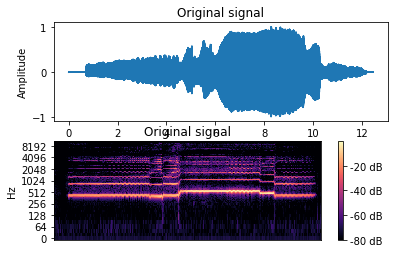

In [10]:
sig , sr = librosa.load('../audioFiles/avm.wav')
winSize = 1024
specType = 'log'
fig = 1

# Plot original signal
plotTimeFreq(sig,sr,'Original signal',winSize,specType,fig)

# Play original signal
IPython.display.Audio(data=sig, rate=sr)

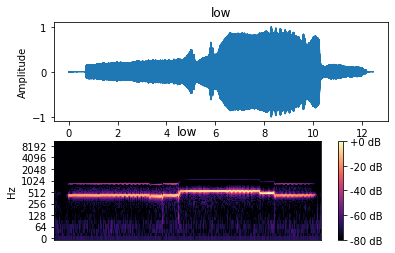

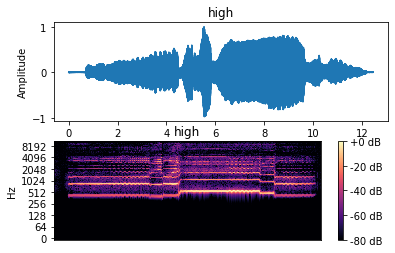

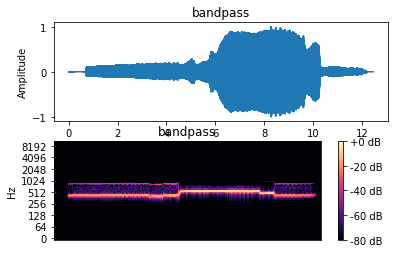

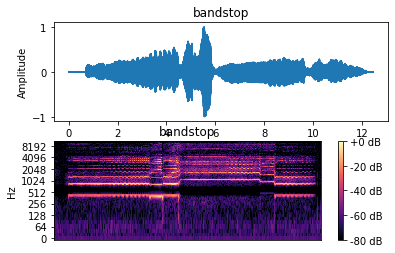

In [11]:
sig_lp, sig_hp, sig_bp, sig_bs=allFilters(sig, sr, 600, 200, 4, winSize, specType)

In [12]:
IPython.display.Audio(data=sig_lp, rate=sr) 

In [13]:
IPython.display.Audio(data=sig_hp, rate=sr) 

In [14]:
IPython.display.Audio(data=sig_bp, rate=sr) 

In [15]:
IPython.display.Audio(data=sig_bs, rate=sr)